### Numpy basics

**EXAM**
1 or 2 exercises of these topic will present at the exam!!

Do all of them properly!!

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [19]:
import numpy as np #import np library
m0=np.arange(12) #m0 is a 1D array filled with integer numbers in range 12 (e.g. from 0-11)
print(m0)
print("rank:",m0.ndim,",shape (nrows,ncols):",m0.shape,"type:",m0.dtype,"\n")

 
m=m0.reshape((3,4))
print(m) #reshape arrange the 1D array into a 2D array (a matrix) with 3 rows, 4 colums
print("rank:",m.ndim,",shape (nrows,ncols):",m.shape,"type:",m0.dtype)




[ 0  1  2  3  4  5  6  7  8  9 10 11]
rank: 1 ,shape (nrows,ncols): (12,) type: int64 

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
rank: 2 ,shape (nrows,ncols): (3, 4) type: int64


notes about arange
arange(stop): Values are generated within the half-open interval [0, stop)
(in other words, the interval including start but excluding stop).
see documentation

https://numpy.org/doc/stable/reference/generated/numpy.arange.html

numpy.reshape    

https://numpy.org/doc/stable/reference/generated/numpy.reshape.html?highlight=reshape    

2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


**outer function**

https://numpy.org/doc/stable/reference/generated/numpy.outer.html?highlight=outer#numpy.outer

https://www.geeksforgeeks.org/numpy-outer-function-python/

tile

https://numpy.org/doc/stable/reference/generated/numpy.tile.html?highlight=tile#numpy.tile

broadcasting

https://numpy.org/doc/stable/user/basics.broadcasting.html

https://stackoverflow.com/questions/29241056/how-do-i-use-np-newaxis

https://numpy.org/doc/1.20/user/theory.broadcasting.html

In [109]:
#outer product= product of u x (v)^T 
#out[i, j] = u[i] * b[j]
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
print("u:",u)
print("v:",v)

#using outer function
k=np.outer(u,v)
print("using numpy outer:")
print("u x v:\n",k,"\n")

#list comprehension
print("using list comprehension:")
outp = np.array([u[i]*v[j] for i in range(len(u)) for j in range(len(v))])#.reshape((len(u),len(v)))
outp=outp.reshape((len(u),len(v)))
print(outp, '\n')

#nested loop
print("using nested loop:")

l=[]
for i in range(len(u)):
    for j in range(len(v)):
        l.append(u[i]*v[j])
#print(l)        
w=np.array(l).reshape(len(u),len(v))
print(w)

#Using numpy broadcasting operations
print("using numpy broadcasting operations 1:")

#tile makes tot copies of vector u, according to a matrix (len(u),len(u))
#then it is transposed
mu=np.tile(u,(len(u),1)).T
print("tiled_u \n",mu)
mv=np.tile(v,(len(v),1))
print("tiled_v_Transposed \n",mv)
prod=mu*mv #element wise product
print("u*vT \n",prod,"\n")


print("using numpy broadcasting operations 2:")

#Here the newaxis index operator inserts a new axis into the vectors, u,v, making them a two-dimensional 4x1 and 1x4 array

# make it as column vector by inserting an axis along second dimension
col_vec = u[:, np.newaxis]     # arr[:, None]
print("defining a column vector")
print(col_vec,"\n","shape",col_vec.shape)

# make it as row vector by inserting an axis along first dimension
row_vec = v[np.newaxis, :]     # arr[None, :]
print("defining a row vector")
print(row_vec,"\n","shape",row_vec.shape)

print(row_vec*col_vec)

u: [1 3 5 7]
v: [2 4 6 8]
using numpy outer:
u x v:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

using list comprehension:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

using nested loop:
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
using numpy broadcasting operations 1:
tiled_u 
 [[1 1 1 1]
 [3 3 3 3]
 [5 5 5 5]
 [7 7 7 7]]
tiled_v_Transposed 
 [[2 4 6 8]
 [2 4 6 8]
 [2 4 6 8]
 [2 4 6 8]]
u*vT 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

using numpy broadcasting operations 2:
defining a column vector
[[1]
 [3]
 [5]
 [7]] 
 shape (4, 1)
defining a row vector
[[2 4 6 8]] 
 shape (1, 4)
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

ABOUT ANY

https://www.sharpsightlabs.com/blog/numpy-any/

If you use np.any() on an array with boolean values, the function will test if any of the elements are True. 

if you have a 2D array and you set axis = 1, the function will operate horizontally along axis-1. This effectively applies the function across the rows.

if you have a 2D array and you set axis = 0, the function will operate downward along axis-0. This effectively applies the function down the columns.

In [175]:
#10x6 matrix
import numpy.random as npr
npr.seed(123)#fix the seed for reproducible results

mat = np.array([npr.rand() for i in range(10*6)]).reshape((10,6))
print(mat)

print("\n fast way \n")
mat2=npr.rand(10,6) #rand uniform distribution between 0-1, to fill a 10x6 matrix
print(mat2)

mask=(mat2<=0.1)
print("the mask:",mask,"\n")
filt_mat=mat2[mask]
print("filtered:\n",filt_mat)

k=np.any(mask,axis=1,keepdims=True) #if at least one entry is <=0.1 returns TRUE
print(k)
k=np.array(k)
#k=k[:, np.newaxis]
#k=np.tile(k,(1,6))
#print(k)
k=k.astype(int)
k=np.logical_not(k) #For each line with at least 1 entry <=0 returns FALSE==0
print("shape k",k.shape,"\n",k)
print("shape m",mat2.shape,"\n",mat2)
print("final matrix, filtered")
print(k*mat2) #element wise product with broadcasting of klines (imposing same value)
#each line with no small entries remains the same (*1) while the other becomes 0

#print(mat2*k)
#mat2[k]
#print("new mat2 \n",mat2)

#print(np.any(mat2<=0))

[[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319  0.39211752 0.34317802 0.72904971]
 [0.43857224 0.0596779  0.39804426 0.73799541 0.18249173 0.17545176]
 [0.53155137 0.53182759 0.63440096 0.84943179 0.72445532 0.61102351]
 [0.72244338 0.32295891 0.36178866 0.22826323 0.29371405 0.63097612]
 [0.09210494 0.43370117 0.43086276 0.4936851  0.42583029 0.31226122]
 [0.42635131 0.89338916 0.94416002 0.50183668 0.62395295 0.1156184 ]
 [0.31728548 0.41482621 0.86630916 0.25045537 0.48303426 0.98555979]
 [0.51948512 0.61289453 0.12062867 0.8263408  0.60306013 0.54506801]
 [0.34276383 0.30412079 0.41702221 0.68130077 0.87545684 0.51042234]]

 fast way 

[[0.66931378 0.58593655 0.6249035  0.67468905 0.84234244 0.08319499]
 [0.76368284 0.24366637 0.19422296 0.57245696 0.09571252 0.88532683]
 [0.62724897 0.72341636 0.01612921 0.59443188 0.55678519 0.15895964]
 [0.15307052 0.69552953 0.31876643 0.6919703  0.55438325 0.38895057]
 [0.92513249 0.84167

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

linspace
https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

slicing
[start:end:step]

https://www.w3schools.com/python/numpy/numpy_array_slicing.asp

sin, cos element wise
https://numpy.org/doc/stable/reference/generated/numpy.sin.html


to do the plot::

import matplotlib.pyplot as plt

https://www.tutorialspoint.com/numpy/numpy_matplotlib.htm

plot aesthetics

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html


[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

/opt/ubuntu-16.04/conda/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


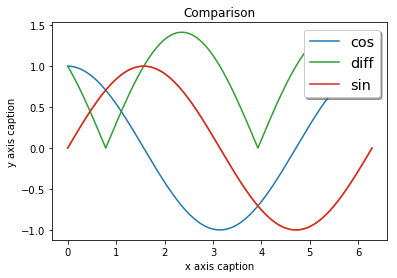

In [80]:
import numpy as np
#print(np.pi)
a=np.array(np.linspace(0,2*np.pi,100)) #array containing 100 evenly spaced num, in [0,2pi]
print(a,"\n rank:",a.ndim, "shape",a.shape,'\n')

#ntot=len(a)
#print(ntot)
print('every 10th element')
print(a[9:len(a):10]) #print values from [start,stop) with STEP 10
print('alternative')
print(a[9::10]) #the stop can be inplicit if you omit it
#1st element START is included, while STOP is excluded
#index 9 = 10th element included,  index 100=101th element ecluded, last element 100 included
print('\n')
print(a[len(a)-1:0:-1]) #the very 1st element is excluded...
print('\n')
print(a[::-1]) #to revert the array, use a negetive STEP


#USING np.sin, np.cos since they are applied element wise
print('\n','cos(a):\n',np.cos(a),'\n','sin(a):\n',np.sin(a),'\n','difference:\n',np.abs(np.sin(a)-np.cos(a)))

mask2=(np.abs(np.sin(a)-np.cos(a))<0.1) #elements less than 0.1
print(mask2)

filtered_a=a[mask2] #removes the values where the mask is false
#all elements whose abs(sin-cos)>0.1 are removed
print('filtered \n',filtered_a) #the elements such that abs(sin-cos)<0.1 are kept
print('check abs(sin-cos)<0.1\n',np.abs(np.sin(filtered_a)-np.cos(filtered_a)))



#to do the plot another library is needed
import matplotlib.pyplot as plt
x=np.linspace(0,2*np.pi,1e6)
plt.plot(x,np.cos(x),label='cos')
plt.plot(x,np.sin(x))
plt.plot(x,np.abs(np.sin(x)-np.cos(x)),label='diff')


plt.title("Comparison") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,np.sin(x),label='sin') 
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.show()



5. Create a matrix that shows the 10 by 10 multiplication table.

  1.  Find the trace of the matrix
  2.  Extract the anto-diagonal (this should be array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10]))
  3.  Extract the diagnoal offset by 1 upwards (this should be array([ 2, 6, 12, 20, 30, 42, 56, 72, 90]))



about the trace
https://numpy.org/doc/stable/reference/generated/numpy.trace.html

about the diagonal
np.diagonal()
https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html

np.diag() for 1D,2D only
https://numpy.org/doc/stable/reference/generated/numpy.diag.html#numpy.diag

for the antidiagonal use the fliplr or flipud functions

In [18]:
import numpy as np
mat3=(np.arange(10),np.arange(2,21,2))
print(mat3)

test=np.array([0*i for i in range(11)])
print(test)
for i in range(1,11):
    test=np.append(test,np.arange(0,(10*i+1),i))

test=test.reshape(11,11)   
print('10x10, from 0:')
print(test)    


test2=np.array([])
for i in range(1,11):
    test2=np.append(test2,np.arange(i,(10*i+1),i))
test2=test2.reshape(10,10)  
print('10x10, from 1:')
print(test2) 

t=np.trace(test)
print('trace',t)

d=np.diag(test)
print('diag',d)

diago=test.diagonal()
print("diagonal",diago)

#to obtain the antidiagonal just first flip the array
#the function fliplr flips the entries of each row from left to right
test_flip=np.fliplr(test2) 
print("flipped LR matrix: \n",test_flip)
#there is also another function that flips up to down
#flipud
test_flipud=np.flipud(test2) 
print("flipped UD matrix: \n",test_flipud)
#the antidiagonale remains the same if you flip up or down or LR

antidiagLR=test_flip.diagonal()
antidiagUD=test_flipud.diagonal()
print("antidiag LR \n",antidiagLR,"\n antidiag UD \n",antidiagUD)
print("antidiag LR \n",np.diag(test_flip),"\n antidiag UD \n",np.diag(test_flipud))

#1st way only for 1d,2D arrays np.diag(arrayname,k)
#k>0 upper, k<0 lower
#1st upper diago k=1

ud=np.diag(test2,1)
print("upper diagonal: \n",ud)

#2nd way using np.diagonal(arrayname, offset=k, axis...)
ud2=np.diagonal(test2,offset=1)
print("upper diagonal: \n",ud2)



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20]))
[0 0 0 0 0 0 0 0 0 0 0]
10x10, from 0:
[[  0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   2   3   4   5   6   7   8   9  10]
 [  0   2   4   6   8  10  12  14  16  18  20]
 [  0   3   6   9  12  15  18  21  24  27  30]
 [  0   4   8  12  16  20  24  28  32  36  40]
 [  0   5  10  15  20  25  30  35  40  45  50]
 [  0   6  12  18  24  30  36  42  48  54  60]
 [  0   7  14  21  28  35  42  49  56  63  70]
 [  0   8  16  24  32  40  48  56  64  72  80]
 [  0   9  18  27  36  45  54  63  72  81  90]
 [  0  10  20  30  40  50  60  70  80  90 100]]
10x10, from 1:
[[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  7.  14.  21.  28.

6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

links


In [45]:
cities=np.array(["Chicago", "Springfield", "Saint-Louis", "Tulsa", "Oklahoma City", "Amarillo", "Santa Fe", "Albuquerque", "Flagstaff", "Los Angeles" ])
print(cities)

dist=np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
print(dist)

#traditional way
grid=np.array([])
for i in range(0,len(dist)):
    for j in range(0,len(dist)):
        grid=np.append(grid,np.abs(dist[j]-dist[i]))
    
    
grid=grid.reshape(len(dist),len(dist))  
print('grid of distances:')
print(grid) 

#creating a grid by using broadcasting
col_dist = dist[:, np.newaxis] 
row_dist = dist[np.newaxis,:]

grid2=np.abs(row_dist-col_dist)
print("grid way 2: \n",grid2)

mile_to_km=1.6#09344

grid_km=mile_to_km*grid2
print("distances in km: \n",grid_km)

#to put labels on grid, use panda library
import pandas as pd
names=["Chicago", "Springfield", "Saint-Louis", "Tulsa", "Oklahoma City", "Amarillo", "Santa Fe", "Albuquerque", "Flagstaff", "Los Angeles" ]
df = pd.DataFrame(grid_km, index=names, columns=names)
print(df)

['Chicago' 'Springfield' 'Saint-Louis' 'Tulsa' 'Oklahoma City' 'Amarillo'
 'Santa Fe' 'Albuquerque' 'Flagstaff' 'Los Angeles']
[   0  198  303  736  871 1175 1475 1544 1913 2448]
grid of distances:
[[   0.  198.  303.  736.  871. 1175. 1475. 1544. 1913. 2448.]
 [ 198.    0.  105.  538.  673.  977. 1277. 1346. 1715. 2250.]
 [ 303.  105.    0.  433.  568.  872. 1172. 1241. 1610. 2145.]
 [ 736.  538.  433.    0.  135.  439.  739.  808. 1177. 1712.]
 [ 871.  673.  568.  135.    0.  304.  604.  673. 1042. 1577.]
 [1175.  977.  872.  439.  304.    0.  300.  369.  738. 1273.]
 [1475. 1277. 1172.  739.  604.  300.    0.   69.  438.  973.]
 [1544. 1346. 1241.  808.  673.  369.   69.    0.  369.  904.]
 [1913. 1715. 1610. 1177. 1042.  738.  438.  369.    0.  535.]
 [2448. 2250. 2145. 1712. 1577. 1273.  973.  904.  535.    0.]]
grid way 2: 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

"sieve of eratosthenes" = Il crivello di Eratostene è un antico algoritmo per il calcolo delle tabelle di numeri primi fino a un certo numero prefissato. 

https://it.wikipedia.org/wiki/Crivello_di_Eratostene

https://www.geeksforgeeks.org/sieve-of-eratosthenes/

about time complexity
https://stackoverflow.com/questions/2582732/time-complexity-of-sieve-of-eratosthenes-algorithm?newreg=4885e3e9cf564bd08444e27a1f30f55a

In [141]:
N=99
num=np.arange(N+1)
print(num.reshape(10,10))

mask_0=np.array([False,False]) #0,1 not primes

for i in range(2,N+1):
    for j in range (2,i+1):
        if i%j==0 and i!=j: 
            temp=False
            break;
        else: temp=True
    mask_0=np.append(mask_0,temp)   
    
print(mask_0)
print(mask_0.astype(int).reshape(10,10))

print(mask_0.shape)
primes=num[mask_0]
print(primes)

#following wiki
A=np.arange(N+1)
print(A,A.shape,len(A))

Amask=np.full((len(A),), True)
print(Amask, Amask.shape, len(Amask))
Amask[0]=False
Amask[1]=False

lim=(np.sqrt(N))
print("nearest integer to sqrt(N)",np.floor(lim))
for i in range(2,int(np.floor(lim))+1):
    if Amask[i]:
        for j in [(i**2+n*i) for n in range(N) if (i**2+n*i)<(N)]:
            Amask[j]=False 
            
print(Amask.astype(int))   
print(A[Amask])




[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
[False False  True  True False  True False  True False False False  True
 False  True False False False  True False  True False False False  True
 False False False False False  True False  True False False False False
 False  True False False False  True False  True False False False  True
 False False False False False  True False False False False False  True
 False  True False False False False False  True False False False  True
 False  True False False False False False  True False False False  True
 False False False False False  True False False False False False False
 False  True False False]
[[0 0 1 1 0 1 0 1 0 0]
 [0 1 0 1 0 0 0 1 0 1]
 [0 0 0 1 0 0

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 7

In [195]:
def primes1(Nlim):
    num=np.arange(Nlim+1)
    m=np.array([False,False]) #0,1 not primes
    for i in range(2,Nlim+1):
        for j in range (2,i+1):
            if i%j==0 and i!=j: 
                temp=False
                break;
            else: temp=True
        m=np.append(m,temp)      
    #print("primes1 numbers up to ",Nlim,":",num[m])
    return num[m]    

def primes2(N):
    A=np.arange(N+1)
    Amask=np.full((len(A),), True)
    Amask[0]=False
    Amask[1]=False
    for i in range(2,int(np.floor(np.sqrt(N)))+1):
        if Amask[i]:
            for j in [(i**2+n*i) for n in range(N) if (i**2+n*i)<=(N)]:
                Amask[j]=False 
    #print("primes2 numbers up to ",N,":",A[Amask])
    return A[Amask]    

Ntry=5000
print(primes1(Ntry))    
print(primes2(Ntry))    

%timeit primes1(Ntry)
%timeit primes2(Ntry)

#from another website
def Sieve(n):
    prime=[True for i in range(n+1)]
    p=2
    while(p*p<=n):
        if (prime[p] == True):
            for i in range(p * p, n+1, p):
                prime[i] = False
        p+=1
    for p in range(2, n+1):
        if prime[p]:print(p)

#Sieve(Ntry)
%timeit Sieve(Ntry)


[   2    3    5    7   11   13   17   19   23   29   31   37   41   43
   47   53   59   61   67   71   73   79   83   89   97  101  103  107
  109  113  127  131  137  139  149  151  157  163  167  173  179  181
  191  193  197  199  211  223  227  229  233  239  241  251  257  263
  269  271  277  281  283  293  307  311  313  317  331  337  347  349
  353  359  367  373  379  383  389  397  401  409  419  421  431  433
  439  443  449  457  461  463  467  479  487  491  499  503  509  521
  523  541  547  557  563  569  571  577  587  593  599  601  607  613
  617  619  631  641  643  647  653  659  661  673  677  683  691  701
  709  719  727  733  739  743  751  757  761  769  773  787  797  809
  811  821  823  827  829  839  853  857  859  863  877  881  883  887
  907  911  919  929  937  941  947  953  967  971  977  983  991  997
 1009 1013 1019 1021 1031 1033 1039 1049 1051 1061 1063 1069 1087 1091
 1093 1097 1103 1109 1117 1123 1129 1151 1153 1163 1171 1181 1187 1193
 1201 

1823
1831
1847
1861
1867
1871
1873
1877
1879
1889
1901
1907
1913
1931
1933
1949
1951
1973
1979
1987
1993
1997
1999
2003
2011
2017
2027
2029
2039
2053
2063
2069
2081
2083
2087
2089
2099
2111
2113
2129
2131
2137
2141
2143
2153
2161
2179
2203
2207
2213
2221
2237
2239
2243
2251
2267
2269
2273
2281
2287
2293
2297
2309
2311
2333
2339
2341
2347
2351
2357
2371
2377
2381
2383
2389
2393
2399
2411
2417
2423
2437
2441
2447
2459
2467
2473
2477
2503
2521
2531
2539
2543
2549
2551
2557
2579
2591
2593
2609
2617
2621
2633
2647
2657
2659
2663
2671
2677
2683
2687
2689
2693
2699
2707
2711
2713
2719
2729
2731
2741
2749
2753
2767
2777
2789
2791
2797
2801
2803
2819
2833
2837
2843
2851
2857
2861
2879
2887
2897
2903
2909
2917
2927
2939
2953
2957
2963
2969
2971
2999
3001
3011
3019
3023
3037
3041
3049
3061
3067
3079
3083
3089
3109
3119
3121
3137
3163
3167
3169
3181
3187
3191
3203
3209
3217
3221
3229
3251
3253
3257
3259
3271
3299
3301
3307
3313
3319
3323
3329
3331
3343
3347
3359
3361
3371
3373
3389
3391
3407
3413


2011
2017
2027
2029
2039
2053
2063
2069
2081
2083
2087
2089
2099
2111
2113
2129
2131
2137
2141
2143
2153
2161
2179
2203
2207
2213
2221
2237
2239
2243
2251
2267
2269
2273
2281
2287
2293
2297
2309
2311
2333
2339
2341
2347
2351
2357
2371
2377
2381
2383
2389
2393
2399
2411
2417
2423
2437
2441
2447
2459
2467
2473
2477
2503
2521
2531
2539
2543
2549
2551
2557
2579
2591
2593
2609
2617
2621
2633
2647
2657
2659
2663
2671
2677
2683
2687
2689
2693
2699
2707
2711
2713
2719
2729
2731
2741
2749
2753
2767
2777
2789
2791
2797
2801
2803
2819
2833
2837
2843
2851
2857
2861
2879
2887
2897
2903
2909
2917
2927
2939
2953
2957
2963
2969
2971
2999
3001
3011
3019
3023
3037
3041
3049
3061
3067
3079
3083
3089
3109
3119
3121
3137
3163
3167
3169
3181
3187
3191
3203
3209
3217
3221
3229
3251
3253
3257
3259
3271
3299
3301
3307
3313
3319
3323
3329
3331
3343
3347
3359
3361
3371
3373
3389
3391
3407
3413
3433
3449
3457
3461
3463
3467
3469
3491
3499
3511
3517
3527
3529
3533
3539
3541
3547
3557
3559
3571
3581
3583
3593
3607


1637
1657
1663
1667
1669
1693
1697
1699
1709
1721
1723
1733
1741
1747
1753
1759
1777
1783
1787
1789
1801
1811
1823
1831
1847
1861
1867
1871
1873
1877
1879
1889
1901
1907
1913
1931
1933
1949
1951
1973
1979
1987
1993
1997
1999
2003
2011
2017
2027
2029
2039
2053
2063
2069
2081
2083
2087
2089
2099
2111
2113
2129
2131
2137
2141
2143
2153
2161
2179
2203
2207
2213
2221
2237
2239
2243
2251
2267
2269
2273
2281
2287
2293
2297
2309
2311
2333
2339
2341
2347
2351
2357
2371
2377
2381
2383
2389
2393
2399
2411
2417
2423
2437
2441
2447
2459
2467
2473
2477
2503
2521
2531
2539
2543
2549
2551
2557
2579
2591
2593
2609
2617
2621
2633
2647
2657
2659
2663
2671
2677
2683
2687
2689
2693
2699
2707
2711
2713
2719
2729
2731
2741
2749
2753
2767
2777
2789
2791
2797
2801
2803
2819
2833
2837
2843
2851
2857
2861
2879
2887
2897
2903
2909
2917
2927
2939
2953
2957
2963
2969
2971
2999
3001
3011
3019
3023
3037
3041
3049
3061
3067
3079
3083
3089
3109
3119
3121
3137
3163
3167
3169
3181
3187
3191
3203
3209
3217
3221
3229
3251


1103
1109
1117
1123
1129
1151
1153
1163
1171
1181
1187
1193
1201
1213
1217
1223
1229
1231
1237
1249
1259
1277
1279
1283
1289
1291
1297
1301
1303
1307
1319
1321
1327
1361
1367
1373
1381
1399
1409
1423
1427
1429
1433
1439
1447
1451
1453
1459
1471
1481
1483
1487
1489
1493
1499
1511
1523
1531
1543
1549
1553
1559
1567
1571
1579
1583
1597
1601
1607
1609
1613
1619
1621
1627
1637
1657
1663
1667
1669
1693
1697
1699
1709
1721
1723
1733
1741
1747
1753
1759
1777
1783
1787
1789
1801
1811
1823
1831
1847
1861
1867
1871
1873
1877
1879
1889
1901
1907
1913
1931
1933
1949
1951
1973
1979
1987
1993
1997
1999
2003
2011
2017
2027
2029
2039
2053
2063
2069
2081
2083
2087
2089
2099
2111
2113
2129
2131
2137
2141
2143
2153
2161
2179
2203
2207
2213
2221
2237
2239
2243
2251
2267
2269
2273
2281
2287
2293
2297
2309
2311
2333
2339
2341
2347
2351
2357
2371
2377
2381
2383
2389
2393
2399
2411
2417
2423
2437
2441
2447
2459
2467
2473
2477
2503
2521
2531
2539
2543
2549
2551
2557
2579
2591
2593
2609
2617
2621
2633
2647
2657


2269
2273
2281
2287
2293
2297
2309
2311
2333
2339
2341
2347
2351
2357
2371
2377
2381
2383
2389
2393
2399
2411
2417
2423
2437
2441
2447
2459
2467
2473
2477
2503
2521
2531
2539
2543
2549
2551
2557
2579
2591
2593
2609
2617
2621
2633
2647
2657
2659
2663
2671
2677
2683
2687
2689
2693
2699
2707
2711
2713
2719
2729
2731
2741
2749
2753
2767
2777
2789
2791
2797
2801
2803
2819
2833
2837
2843
2851
2857
2861
2879
2887
2897
2903
2909
2917
2927
2939
2953
2957
2963
2969
2971
2999
3001
3011
3019
3023
3037
3041
3049
3061
3067
3079
3083
3089
3109
3119
3121
3137
3163
3167
3169
3181
3187
3191
3203
3209
3217
3221
3229
3251
3253
3257
3259
3271
3299
3301
3307
3313
3319
3323
3329
3331
3343
3347
3359
3361
3371
3373
3389
3391
3407
3413
3433
3449
3457
3461
3463
3467
3469
3491
3499
3511
3517
3527
3529
3533
3539
3541
3547
3557
3559
3571
3581
3583
3593
3607
3613
3617
3623
3631
3637
3643
3659
3671
3673
3677
3691
3697
3701
3709
3719
3727
3733
3739
3761
3767
3769
3779
3793
3797
3803
3821
3823
3833
3847
3851
3853
3863


2837
2843
2851
2857
2861
2879
2887
2897
2903
2909
2917
2927
2939
2953
2957
2963
2969
2971
2999
3001
3011
3019
3023
3037
3041
3049
3061
3067
3079
3083
3089
3109
3119
3121
3137
3163
3167
3169
3181
3187
3191
3203
3209
3217
3221
3229
3251
3253
3257
3259
3271
3299
3301
3307
3313
3319
3323
3329
3331
3343
3347
3359
3361
3371
3373
3389
3391
3407
3413
3433
3449
3457
3461
3463
3467
3469
3491
3499
3511
3517
3527
3529
3533
3539
3541
3547
3557
3559
3571
3581
3583
3593
3607
3613
3617
3623
3631
3637
3643
3659
3671
3673
3677
3691
3697
3701
3709
3719
3727
3733
3739
3761
3767
3769
3779
3793
3797
3803
3821
3823
3833
3847
3851
3853
3863
3877
3881
3889
3907
3911
3917
3919
3923
3929
3931
3943
3947
3967
3989
4001
4003
4007
4013
4019
4021
4027
4049
4051
4057
4073
4079
4091
4093
4099
4111
4127
4129
4133
4139
4153
4157
4159
4177
4201
4211
4217
4219
4229
4231
4241
4243
4253
4259
4261
4271
4273
4283
4289
4297
4327
4337
4339
4349
4357
4363
4373
4391
4397
4409
4421
4423
4441
4447
4451
4457
4463
4481
4483
4493
4507


1999
2003
2011
2017
2027
2029
2039
2053
2063
2069
2081
2083
2087
2089
2099
2111
2113
2129
2131
2137
2141
2143
2153
2161
2179
2203
2207
2213
2221
2237
2239
2243
2251
2267
2269
2273
2281
2287
2293
2297
2309
2311
2333
2339
2341
2347
2351
2357
2371
2377
2381
2383
2389
2393
2399
2411
2417
2423
2437
2441
2447
2459
2467
2473
2477
2503
2521
2531
2539
2543
2549
2551
2557
2579
2591
2593
2609
2617
2621
2633
2647
2657
2659
2663
2671
2677
2683
2687
2689
2693
2699
2707
2711
2713
2719
2729
2731
2741
2749
2753
2767
2777
2789
2791
2797
2801
2803
2819
2833
2837
2843
2851
2857
2861
2879
2887
2897
2903
2909
2917
2927
2939
2953
2957
2963
2969
2971
2999
3001
3011
3019
3023
3037
3041
3049
3061
3067
3079
3083
3089
3109
3119
3121
3137
3163
3167
3169
3181
3187
3191
3203
3209
3217
3221
3229
3251
3253
3257
3259
3271
3299
3301
3307
3313
3319
3323
3329
3331
3343
3347
3359
3361
3371
3373
3389
3391
3407
3413
3433
3449
3457
3461
3463
3467
3469
3491
3499
3511
3517
3527
3529
3533
3539
3541
3547
3557
3559
3571
3581
3583


1231
1237
1249
1259
1277
1279
1283
1289
1291
1297
1301
1303
1307
1319
1321
1327
1361
1367
1373
1381
1399
1409
1423
1427
1429
1433
1439
1447
1451
1453
1459
1471
1481
1483
1487
1489
1493
1499
1511
1523
1531
1543
1549
1553
1559
1567
1571
1579
1583
1597
1601
1607
1609
1613
1619
1621
1627
1637
1657
1663
1667
1669
1693
1697
1699
1709
1721
1723
1733
1741
1747
1753
1759
1777
1783
1787
1789
1801
1811
1823
1831
1847
1861
1867
1871
1873
1877
1879
1889
1901
1907
1913
1931
1933
1949
1951
1973
1979
1987
1993
1997
1999
2003
2011
2017
2027
2029
2039
2053
2063
2069
2081
2083
2087
2089
2099
2111
2113
2129
2131
2137
2141
2143
2153
2161
2179
2203
2207
2213
2221
2237
2239
2243
2251
2267
2269
2273
2281
2287
2293
2297
2309
2311
2333
2339
2341
2347
2351
2357
2371
2377
2381
2383
2389
2393
2399
2411
2417
2423
2437
2441
2447
2459
2467
2473
2477
2503
2521
2531
2539
2543
2549
2551
2557
2579
2591
2593
2609
2617
2621
2633
2647
2657
2659
2663
2671
2677
2683
2687
2689
2693
2699
2707
2711
2713
2719
2729
2731
2741
2749


4729
4733
4751
4759
4783
4787
4789
4793
4799
4801
4813
4817
4831
4861
4871
4877
4889
4903
4909
4919
4931
4933
4937
4943
4951
4957
4967
4969
4973
4987
4993
4999
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
101
103
107
109
113
127
131
137
139
149
151
157
163
167
173
179
181
191
193
197
199
211
223
227
229
233
239
241
251
257
263
269
271
277
281
283
293
307
311
313
317
331
337
347
349
353
359
367
373
379
383
389
397
401
409
419
421
431
433
439
443
449
457
461
463
467
479
487
491
499
503
509
521
523
541
547
557
563
569
571
577
587
593
599
601
607
613
617
619
631
641
643
647
653
659
661
673
677
683
691
701
709
719
727
733
739
743
751
757
761
769
773
787
797
809
811
821
823
827
829
839
853
857
859
863
877
881
883
887
907
911
919
929
937
941
947
953
967
971
977
983
991
997
1009
1013
1019
1021
1031
1033
1039
1049
1051
1061
1063
1069
1087
1091
1093
1097
1103
1109
1117
1123
1129
1151
1153
1163
1171
1181
1187
1193
1201
1213
1217
1223
1229
1231
1237
1249
1259
1277
1279
12

757
761
769
773
787
797
809
811
821
823
827
829
839
853
857
859
863
877
881
883
887
907
911
919
929
937
941
947
953
967
971
977
983
991
997
1009
1013
1019
1021
1031
1033
1039
1049
1051
1061
1063
1069
1087
1091
1093
1097
1103
1109
1117
1123
1129
1151
1153
1163
1171
1181
1187
1193
1201
1213
1217
1223
1229
1231
1237
1249
1259
1277
1279
1283
1289
1291
1297
1301
1303
1307
1319
1321
1327
1361
1367
1373
1381
1399
1409
1423
1427
1429
1433
1439
1447
1451
1453
1459
1471
1481
1483
1487
1489
1493
1499
1511
1523
1531
1543
1549
1553
1559
1567
1571
1579
1583
1597
1601
1607
1609
1613
1619
1621
1627
1637
1657
1663
1667
1669
1693
1697
1699
1709
1721
1723
1733
1741
1747
1753
1759
1777
1783
1787
1789
1801
1811
1823
1831
1847
1861
1867
1871
1873
1877
1879
1889
1901
1907
1913
1931
1933
1949
1951
1973
1979
1987
1993
1997
1999
2003
2011
2017
2027
2029
2039
2053
2063
2069
2081
2083
2087
2089
2099
2111
2113
2129
2131
2137
2141
2143
2153
2161
2179
2203
2207
2213
2221
2237
2239
2243
2251
2267
2269
2273
2281
2287


1019
1021
1031
1033
1039
1049
1051
1061
1063
1069
1087
1091
1093
1097
1103
1109
1117
1123
1129
1151
1153
1163
1171
1181
1187
1193
1201
1213
1217
1223
1229
1231
1237
1249
1259
1277
1279
1283
1289
1291
1297
1301
1303
1307
1319
1321
1327
1361
1367
1373
1381
1399
1409
1423
1427
1429
1433
1439
1447
1451
1453
1459
1471
1481
1483
1487
1489
1493
1499
1511
1523
1531
1543
1549
1553
1559
1567
1571
1579
1583
1597
1601
1607
1609
1613
1619
1621
1627
1637
1657
1663
1667
1669
1693
1697
1699
1709
1721
1723
1733
1741
1747
1753
1759
1777
1783
1787
1789
1801
1811
1823
1831
1847
1861
1867
1871
1873
1877
1879
1889
1901
1907
1913
1931
1933
1949
1951
1973
1979
1987
1993
1997
1999
2003
2011
2017
2027
2029
2039
2053
2063
2069
2081
2083
2087
2089
2099
2111
2113
2129
2131
2137
2141
2143
2153
2161
2179
2203
2207
2213
2221
2237
2239
2243
2251
2267
2269
2273
2281
2287
2293
2297
2309
2311
2333
2339
2341
2347
2351
2357
2371
2377
2381
2383
2389
2393
2399
2411
2417
2423
2437
2441
2447
2459
2467
2473
2477
2503
2521
2531


4049
4051
4057
4073
4079
4091
4093
4099
4111
4127
4129
4133
4139
4153
4157
4159
4177
4201
4211
4217
4219
4229
4231
4241
4243
4253
4259
4261
4271
4273
4283
4289
4297
4327
4337
4339
4349
4357
4363
4373
4391
4397
4409
4421
4423
4441
4447
4451
4457
4463
4481
4483
4493
4507
4513
4517
4519
4523
4547
4549
4561
4567
4583
4591
4597
4603
4621
4637
4639
4643
4649
4651
4657
4663
4673
4679
4691
4703
4721
4723
4729
4733
4751
4759
4783
4787
4789
4793
4799
4801
4813
4817
4831
4861
4871
4877
4889
4903
4909
4919
4931
4933
4937
4943
4951
4957
4967
4969
4973
4987
4993
4999
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
101
103
107
109
113
127
131
137
139
149
151
157
163
167
173
179
181
191
193
197
199
211
223
227
229
233
239
241
251
257
263
269
271
277
281
283
293
307
311
313
317
331
337
347
349
353
359
367
373
379
383
389
397
401
409
419
421
431
433
439
443
449
457
461
463
467
479
487
491
499
503
509
521
523
541
547
557
563
569
571
577
587
593
599
601
607
613
617
619
631
641
643
6

4363
4373
4391
4397
4409
4421
4423
4441
4447
4451
4457
4463
4481
4483
4493
4507
4513
4517
4519
4523
4547
4549
4561
4567
4583
4591
4597
4603
4621
4637
4639
4643
4649
4651
4657
4663
4673
4679
4691
4703
4721
4723
4729
4733
4751
4759
4783
4787
4789
4793
4799
4801
4813
4817
4831
4861
4871
4877
4889
4903
4909
4919
4931
4933
4937
4943
4951
4957
4967
4969
4973
4987
4993
4999
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
101
103
107
109
113
127
131
137
139
149
151
157
163
167
173
179
181
191
193
197
199
211
223
227
229
233
239
241
251
257
263
269
271
277
281
283
293
307
311
313
317
331
337
347
349
353
359
367
373
379
383
389
397
401
409
419
421
431
433
439
443
449
457
461
463
467
479
487
491
499
503
509
521
523
541
547
557
563
569
571
577
587
593
599
601
607
613
617
619
631
641
643
647
653
659
661
673
677
683
691
701
709
719
727
733
739
743
751
757
761
769
773
787
797
809
811
821
823
827
829
839
853
857
859
863
877
881
883
887
907
911
919
929
937
941
947
953
967
971
977

1913
1931
1933
1949
1951
1973
1979
1987
1993
1997
1999
2003
2011
2017
2027
2029
2039
2053
2063
2069
2081
2083
2087
2089
2099
2111
2113
2129
2131
2137
2141
2143
2153
2161
2179
2203
2207
2213
2221
2237
2239
2243
2251
2267
2269
2273
2281
2287
2293
2297
2309
2311
2333
2339
2341
2347
2351
2357
2371
2377
2381
2383
2389
2393
2399
2411
2417
2423
2437
2441
2447
2459
2467
2473
2477
2503
2521
2531
2539
2543
2549
2551
2557
2579
2591
2593
2609
2617
2621
2633
2647
2657
2659
2663
2671
2677
2683
2687
2689
2693
2699
2707
2711
2713
2719
2729
2731
2741
2749
2753
2767
2777
2789
2791
2797
2801
2803
2819
2833
2837
2843
2851
2857
2861
2879
2887
2897
2903
2909
2917
2927
2939
2953
2957
2963
2969
2971
2999
3001
3011
3019
3023
3037
3041
3049
3061
3067
3079
3083
3089
3109
3119
3121
3137
3163
3167
3169
3181
3187
3191
3203
3209
3217
3221
3229
3251
3253
3257
3259
3271
3299
3301
3307
3313
3319
3323
3329
3331
3343
3347
3359
3361
3371
3373
3389
3391
3407
3413
3433
3449
3457
3461
3463
3467
3469
3491
3499
3511
3517
3527


587
593
599
601
607
613
617
619
631
641
643
647
653
659
661
673
677
683
691
701
709
719
727
733
739
743
751
757
761
769
773
787
797
809
811
821
823
827
829
839
853
857
859
863
877
881
883
887
907
911
919
929
937
941
947
953
967
971
977
983
991
997
1009
1013
1019
1021
1031
1033
1039
1049
1051
1061
1063
1069
1087
1091
1093
1097
1103
1109
1117
1123
1129
1151
1153
1163
1171
1181
1187
1193
1201
1213
1217
1223
1229
1231
1237
1249
1259
1277
1279
1283
1289
1291
1297
1301
1303
1307
1319
1321
1327
1361
1367
1373
1381
1399
1409
1423
1427
1429
1433
1439
1447
1451
1453
1459
1471
1481
1483
1487
1489
1493
1499
1511
1523
1531
1543
1549
1553
1559
1567
1571
1579
1583
1597
1601
1607
1609
1613
1619
1621
1627
1637
1657
1663
1667
1669
1693
1697
1699
1709
1721
1723
1733
1741
1747
1753
1759
1777
1783
1787
1789
1801
1811
1823
1831
1847
1861
1867
1871
1873
1877
1879
1889
1901
1907
1913
1931
1933
1949
1951
1973
1979
1987
1993
1997
1999
2003
2011
2017
2027
2029
2039
2053
2063
2069
2081
2083
2087
2089
2099
2111
21

4091
4093
4099
4111
4127
4129
4133
4139
4153
4157
4159
4177
4201
4211
4217
4219
4229
4231
4241
4243
4253
4259
4261
4271
4273
4283
4289
4297
4327
4337
4339
4349
4357
4363
4373
4391
4397
4409
4421
4423
4441
4447
4451
4457
4463
4481
4483
4493
4507
4513
4517
4519
4523
4547
4549
4561
4567
4583
4591
4597
4603
4621
4637
4639
4643
4649
4651
4657
4663
4673
4679
4691
4703
4721
4723
4729
4733
4751
4759
4783
4787
4789
4793
4799
4801
4813
4817
4831
4861
4871
4877
4889
4903
4909
4919
4931
4933
4937
4943
4951
4957
4967
4969
4973
4987
4993
4999
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
101
103
107
109
113
127
131
137
139
149
151
157
163
167
173
179
181
191
193
197
199
211
223
227
229
233
239
241
251
257
263
269
271
277
281
283
293
307
311
313
317
331
337
347
349
353
359
367
373
379
383
389
397
401
409
419
421
431
433
439
443
449
457
461
463
467
479
487
491
499
503
509
521
523
541
547
557
563
569
571
577
587
593
599
601
607
613
617
619
631
641
643
647
653
659
661
673
677
68

3931
3943
3947
3967
3989
4001
4003
4007
4013
4019
4021
4027
4049
4051
4057
4073
4079
4091
4093
4099
4111
4127
4129
4133
4139
4153
4157
4159
4177
4201
4211
4217
4219
4229
4231
4241
4243
4253
4259
4261
4271
4273
4283
4289
4297
4327
4337
4339
4349
4357
4363
4373
4391
4397
4409
4421
4423
4441
4447
4451
4457
4463
4481
4483
4493
4507
4513
4517
4519
4523
4547
4549
4561
4567
4583
4591
4597
4603
4621
4637
4639
4643
4649
4651
4657
4663
4673
4679
4691
4703
4721
4723
4729
4733
4751
4759
4783
4787
4789
4793
4799
4801
4813
4817
4831
4861
4871
4877
4889
4903
4909
4919
4931
4933
4937
4943
4951
4957
4967
4969
4973
4987
4993
4999
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
101
103
107
109
113
127
131
137
139
149
151
157
163
167
173
179
181
191
193
197
199
211
223
227
229
233
239
241
251
257
263
269
271
277
281
283
293
307
311
313
317
331
337
347
349
353
359
367
373
379
383
389
397
401
409
419
421
431
433
439
443
449
457
461
463
467
479
487
491
499
503
509
521
523
541
547
557
5

887
907
911
919
929
937
941
947
953
967
971
977
983
991
997
1009
1013
1019
1021
1031
1033
1039
1049
1051
1061
1063
1069
1087
1091
1093
1097
1103
1109
1117
1123
1129
1151
1153
1163
1171
1181
1187
1193
1201
1213
1217
1223
1229
1231
1237
1249
1259
1277
1279
1283
1289
1291
1297
1301
1303
1307
1319
1321
1327
1361
1367
1373
1381
1399
1409
1423
1427
1429
1433
1439
1447
1451
1453
1459
1471
1481
1483
1487
1489
1493
1499
1511
1523
1531
1543
1549
1553
1559
1567
1571
1579
1583
1597
1601
1607
1609
1613
1619
1621
1627
1637
1657
1663
1667
1669
1693
1697
1699
1709
1721
1723
1733
1741
1747
1753
1759
1777
1783
1787
1789
1801
1811
1823
1831
1847
1861
1867
1871
1873
1877
1879
1889
1901
1907
1913
1931
1933
1949
1951
1973
1979
1987
1993
1997
1999
2003
2011
2017
2027
2029
2039
2053
2063
2069
2081
2083
2087
2089
2099
2111
2113
2129
2131
2137
2141
2143
2153
2161
2179
2203
2207
2213
2221
2237
2239
2243
2251
2267
2269
2273
2281
2287
2293
2297
2309
2311
2333
2339
2341
2347
2351
2357
2371
2377
2381
2383
2389
2393


**N.B. the following exercises are meant to be solved only if you are familiar with the numpy random library. If not you can skip them (postponed for one of the next exercise sessions)**


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

In [219]:
Nwalkers=1000
Nsteps=200

walk=np.random.randint(low=-1,high=1,size=(Nwalkers,Nsteps))
for i in range(Nwalkers):
    walk[i][0]=(i+1)

for i in range(Nwalkers):
    for j in range(Nsteps):
        if walk[i][j]==0:
            walk[i][j]=+1
    
print(walk.shape,"\n","n.walker-step \n",walk)


(1000, 200) 
 n.walker-step 
 [[   1   -1   -1 ...    1    1   -1]
 [   2    1    1 ...   -1   -1    1]
 [   3    1    1 ...   -1    1    1]
 ...
 [ 998    1   -1 ...   -1   -1   -1]
 [ 999    1   -1 ...    1    1    1]
 [1000   -1    1 ...   -1   -1    1]]


9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.